In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [56]:
total = pd.read_csv("../CSV/train_data.csv")
test = pd.read_csv("../CSV/pred_test.csv")

print("total shape : {}, test shape : {}".format(total.shape, test.shape))

total shape : (368088, 12), test shape : (15120, 12)


In [57]:
total.head(3)

,연월일,시간,일시,year,month,day,hour,weekday,구분,구분_int,공급량,기온(°C)
0,2013-01-01,1,2013-01-01 00:00:00,2013,1,1,0,1,A,0,2497.129,-8.3
1,2013-01-01,2,2013-01-01 01:00:00,2013,1,1,1,1,A,0,2363.265,-8.5
2,2013-01-01,3,2013-01-01 02:00:00,2013,1,1,2,1,A,0,2258.505,-8.4


In [58]:
def nmae(true_df, pred_df):
    target_idx = true_df.iloc[:,0]
    pred_df = pred_df[pred_df.iloc[:,0].isin(target_idx)]
    pred_df = pred_df.sort_values(by=[pred_df.columns[0]], ascending=[True])
    true_df = true_df.sort_values(by=[true_df.columns[0]], ascending=[True])
    
    true = true_df.iloc[:,1].to_numpy()
    pred = pred_df.iloc[:,1].to_numpy()
    
    score = np.mean((np.abs(true-pred))/true)
    
    return score

In [59]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

train = total[total['year'].isin(train_years)]
val = total[total['year'].isin(val_years)]

# "year", "month", "day", "hour", "weekday", "구분_int", "기온(°C)"
features = ["month", "hour", "구분_int", "기온(°C)"]
# features = ["year", "month", "day", "hour", "weekday", "구분_int", "기온(°C)"]
train_x = train[features]
train_y = train['공급량']

val_x = val[features]
val_y = val['공급량']

X = total[features]
y = total["공급량"]

In [66]:
grid_parameters = {"max_depth" : [12, 14, 16], 
                   "n_estimators" : [1000, 1500, 2000]}

kfold = KFold(n_splits = 10, shuffle = True, random_state = 27)

model = RandomForestRegressor(n_jobs = -1, random_state = 37)
grid_search = GridSearchCV(model, param_grid = grid_parameters, cv = kfold, n_jobs = -1)
grid_search.fit(train_x, train_y)

print('GridSearchCV 최적 파라미터 : ', grid_search.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_search.best_score_))

# fit train_x, train_y


KeyboardInterrupt: 

In [53]:
params = {
    "n_estimators" : 500, 
    "max_depth" : 16, 
    "min_samples_split" : 0.01
}

model = RandomForestRegressor( n_jobs = -1, random_state = 37)
model.fit(train_x, train_y)

pred = model.predict(val_x)

true_y = pd.DataFrame({"y" : val_y})
pred_y = pd.DataFrame({"pred_y" : pred})

true_y.reset_index(drop = True, inplace = True)
true_y.reset_index(inplace = True)
pred_y.reset_index(inplace = True)

# cross_score = cross_val_score(model, X, y, cv = 3)

print("학습용 데이터 결정계수: {:.3f}".format(model.score(train_x, train_y)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(val_x, val_y)))

print("MAE : {:.6f}".format(mean_absolute_error(val_y, pred)))
print("MSE : {:.6f}".format(mean_squared_error(val_y, pred)))
print("RMSE : {:.6f}".format(np.sqrt(mean_squared_error(val_y, pred))))
print("NMAE : {:.6f}".format(nmae(true_y, pred_y)))

# MSE : 39904.1132016225
# NMAE : 0.559370

학습용 데이터 결정계수: 0.989
테스트 데이터 결정계수: 0.961
MAE : 119.151963
MSE : 39904.113202
RMSE : 199.760139
NMAE : 0.559370


In [22]:
submission = pd.read_csv('../CSV/가스공급량 수요예측 모델개발 data/sample_submission.csv')

In [23]:
test_x = test[features]
preds = model.predict(test_x)
submission['공급량'] = preds
submission.to_csv("../CSV/Submission/10_4_features_lightgbm_model.csv", index = False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44592 missing from current font.
  

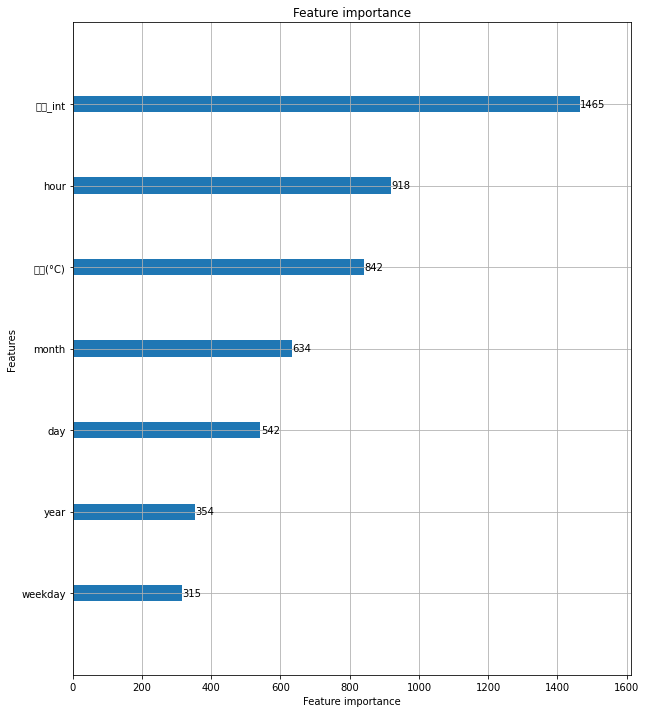

In [9]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(model, ax = ax)